In [28]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import numpy as np
from matplotlib import style

#style.use('ggplot')
#style.use('dark_background')
#style.use('bmh')
#style.use('fivethirtyeight')
#style.use('tableau-colorblind10')
style.use('ggplot')

print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


In [29]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.reset_index(inplace=True)
tsla.tail()
print(plt.__file__)

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py


In [30]:
date = tsla.loc[:, 'Date'].values
date = date2num(date)
openp = tsla.loc[:, 'Open'].values
highp = tsla.loc[:, 'High'].values
lowp = tsla.loc[:, 'Low'].values
closep = tsla.loc[:,'Close'].values
volume = tsla.loc[:, 'Volume'].values

x = 0
y = len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
    new_list.append(append_line)
    x += 1

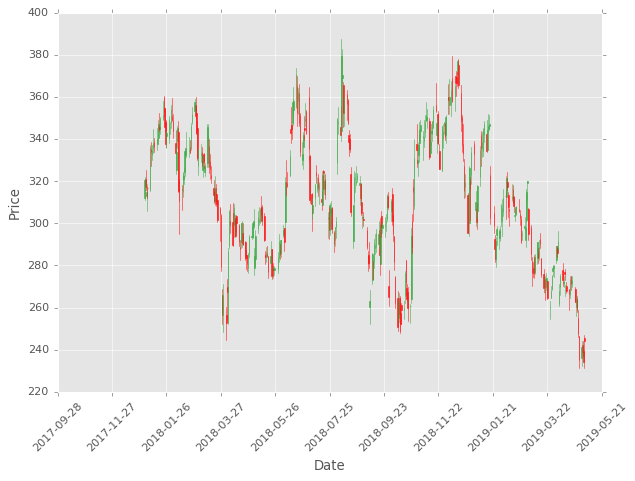

In [31]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
plt.xlabel('Date')


candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
ax1.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()